In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from scipy.stats import poisson
import pytz
import os
import requests
import time
import grequests
%matplotlib inline

HAMO_URL = 'https://sp-ride.tp-tsc.com/omsp/external'
APIKEY = os.getenv('HAMO_APIKEY')

In [4]:
stations = pd.read_csv('stations.csv').set_index('station_id')
id_to_idx = np.load('station_mapping.npy').item()
mean_estimator = np.load('mean_demand_weekday_10min.npy')
estimator = np.load('poisson_estimator_weekday_10min.npy')


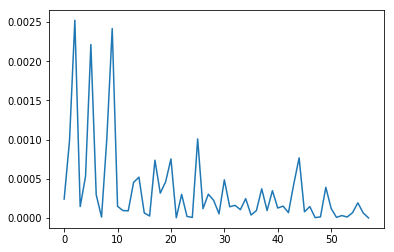

In [60]:
plt.plot(mean_estimator.mean(axis=0).mean(axis=0))

In [5]:
id_to_idx

{'1': 24,
 '10': 23,
 '1029': 55,
 '1030': 56,
 '11': 38,
 '13': 15,
 '14': 16,
 '15': 8,
 '16': 17,
 '17': 1,
 '19': 19,
 '2': 21,
 '20': 39,
 '2008': 25,
 '2010': 31,
 '2011': 34,
 '2013': 30,
 '2014': 13,
 '2015': 28,
 '2016': 0,
 '22': 2,
 '2507': 51,
 '2549': 50,
 '28': 44,
 '3': 20,
 '30': 57,
 '37': 27,
 '38': 11,
 '4': 7,
 '40': 4,
 '41': 37,
 '42': 33,
 '43': 10,
 '44': 14,
 '45': 22,
 '46': 47,
 '47': 48,
 '48': 45,
 '49': 6,
 '51': 43,
 '55': 5,
 '57': 12,
 '58': 49,
 '59': 35,
 '60': 41,
 '61': 26,
 '64': 40,
 '65': 36,
 '66': 18,
 '67': 54,
 '68': 42,
 '69': 46,
 '7': 9,
 '70': 32,
 '71': 29,
 '9': 3,
 '9118': 52,
 '9121': 53}

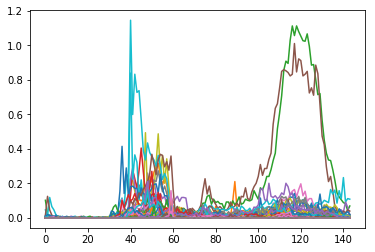

In [10]:
plt.plot(mean_estimator.sum(axis=2));

In [41]:
td = datetime.timedelta(0, 60*10)
nsteps = 3600 * 24 / td.seconds
point = (8 * 6)

In [13]:
nstations = len(stations.index)
estimate = np.array((144, nstations, nstations))

In [14]:
new_index = []
for station_id in stations.index:
    if str(station_id) in id_to_idx.keys():
        new_index.append(id_to_idx[str(station_id)])

In [48]:
idx = np.ix_(range(point,point+12),new_index, new_index)
plt.imshow(estimator[idx].sum(axis=0))

ValueError: Cross index must be 1 dimensional

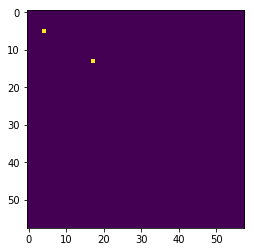

In [47]:
idx2 = np.ix_(new_index, new_index)
plt.imshow(estimator[point,:,:][idx2])

In [50]:
x = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])

d = {
    'a': 2,
    'b': 0,
    'c': 1
}

q = pd.DataFrame(index = ['a', 'b', 'c'], columns = ['a', 'b', 'c'])

In [51]:
new_index = []
for i in q.index:
    if str(i) in d.keys():
        new_index.append(d[str(i)])

In [54]:
idx = np.ix_(new_index, new_index)

In [55]:
x[idx]

array([[9, 7, 8],
       [3, 1, 2],
       [6, 4, 5]])

In [61]:
import matlab.engine

Try pythonengine
Except pythonengine


In [62]:
help(matlab.engine.pythonengine)

Help on module matlabengineforpython2_7:

NAME
    matlabengineforpython2_7

FILE
    /Applications/MATLAB_R2016a.app/extern/engines/python/dist/matlab/engine/maci64/matlabengineforpython2_7.so

FUNCTIONS
    attachMATLABAsync(...)
        attachMATLABAsync() attaches to a shared MATLAB session asynchronously
    
    cancelFEval(...)
        cancelFEval() cancels the execution of a MATLAB function
    
    cancelMATLAB(...)
        cancelMATLAB() cancels the launch or connection to a MATLAB instance
    
    closeMATLAB(...)
        closeMATLAB() terminates MATLAB
    
    closeProcess(...)
        closeProcess() terminates the MATLAB Engine process
    
    createMATLABAsync(...)
        createMATLABAsync() creates a MATLAB instance asynchronously
    
    createProcess(...)
        createProcess() initializes the MATLAB Engine process
    
    destroyFEvalResult(...)
        destroyFEvalResult() destroys the result of a MATLAB function
    
    destroyMATLAB(...)
        destroyMATL

In [124]:
eng = matlab.engine.start_matlab('-logfile test.txt', async = False)

GOT HERE
ATTACHING


In [125]:
matlab.engine.find_matlab()

()

In [118]:
s = eng.sqrt(9., async = True)

In [119]:
s.done()

True

In [120]:
s.result()

3.0

In [65]:
help(matlab.engine.pythonengine.createMATLABAsync)

Help on built-in function createMATLABAsync in module matlabengineforpython2_7:

createMATLABAsync(...)
    createMATLABAsync() creates a MATLAB instance asynchronously



In [67]:
help(matlab.engine.start_matlab)

Help on function start_matlab in module matlab.engine:

start_matlab(option='-nodesktop', async=False)
    Start the MATLAB Engine.  This function creates an instance of the
    MatlabEngine class.  The local version of MATLAB will be launched
    with the "-nodesktop" argument.
    
    Please note the invocation of this function is synchronous, which
    means it only returns after MATLAB launches.
    
    Parameters
        option - MATLAB startup option.
        async: bool - start MATLAB asynchronously or not.  This parameter
        is optional and false by default.
                
    Returns
        MatlabEngine - if aync is false.  This object can be used to evaluate
        MATLAB statements.
        FutureResult - if async is true.  This object can be used to obtain the
        real MatlabEngine instance.
    
    Raises
        EngineError - if MATLAB can't be started.



In [95]:
import time

In [96]:
time.wait(5)

AttributeError: 'module' object has no attribute 'wait'

In [97]:
time.sleep(5)

In [100]:
eng.diary('test.txt', nargout =0) 

In [122]:
eng.sqrt(9.)

3.0

In [105]:
eng.diary(nargout = 0)

In [123]:
matlab.engine.find_matlab()

()